In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, Dense
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization, concatenate, add, Add
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# download the dataset
(_, _), (x_test, _) = mnist.load_data()

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

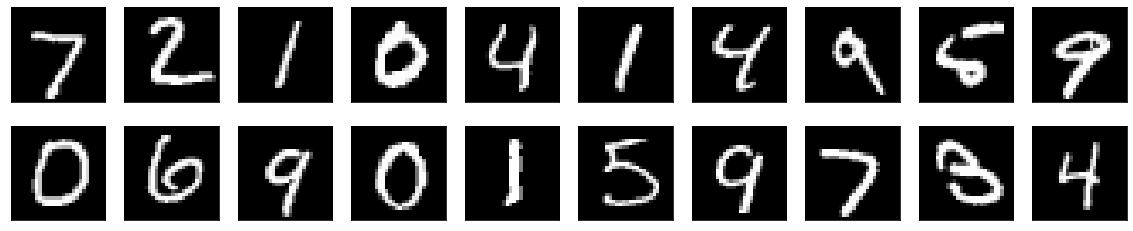

In [ ]:
# Show some training images
fig = plt.figure(figsize=(20, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(x_test[idx], cmap = 'gray')
  #plt.title(class_names[int(y_train[idx])])

In [ ]:
#print("Number of Training Samples: ", len(x_train))
print("Number of Test Samples: ", len(x_test))

Number of Test Samples:  10000


In [ ]:
#train_labels = to_categorical(train_labels, 10)
#test_labels = to_categorical(test_labels, 10)
#print(y_train.shape)
#print(y_test.shape)

In [ ]:
# change data type
#x_train = x_train.astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')

In [ ]:
# normalize data into range 1-0
#x_train /= 255.0
x_test /= 255.0

In [ ]:
#print("Training shape: ", x_train.shape)
print("Testing shape: ", x_test.shape)

Testing shape:  (10000, 28, 28, 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
adv_spa = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/spa.pickle', 'rb')
adv_spa = pickle.load(adv_spa)

In [ ]:
#fgsm = np.clip(fgsm, 0, 1)
adv_spa.shape

(1000, 28, 28, 1)

In [ ]:
ind = np.random.randint(0, 6000)
ind

104

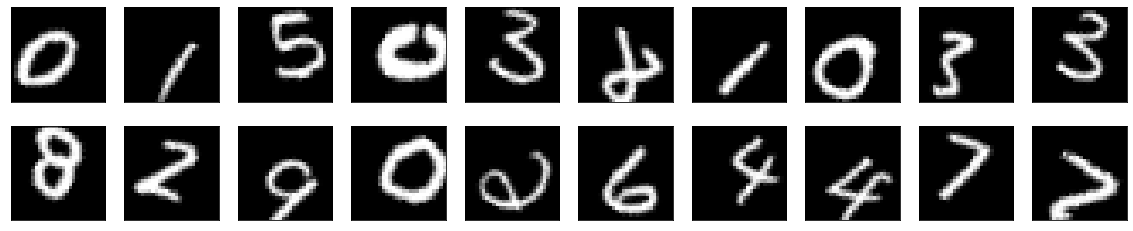

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_spa[np.random.randint(0, 1000)].reshape(28, 28), cmap = 'gray')

In [ ]:
input_shape = (32, 32, 3)
batch_size = 32
epochs = 15

In [ ]:
inputs = Input(shape = (28, 28, 1))
x = inputs

# downsampling 
c28 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(x)
c28 = tf.keras.layers.PReLU()(c28)
c28 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(c28)
c28 = tf.keras.layers.PReLU()(c28)
c28 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(c28)
c28 = tf.keras.layers.PReLU()(c28)
p14 = Conv2D(filters = 128, kernel_size = (1, 1), padding = 'same', strides = 2)(c28)


c14 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(p14)
c14 = tf.keras.layers.PReLU()(c14)
c14 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(c14)
c14 = tf.keras.layers.PReLU()(c14)
c14 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(c14)
c14 = tf.keras.layers.PReLU()(c14)
p7 = Conv2D(filters = 256, kernel_size = (1, 1), padding = 'same', strides = 2)(c14)

# upsampling
t14 = Conv2DTranspose(filters = 256, kernel_size = (1, 1), padding = 'same', strides = 2)(p7)
t14 = tf.keras.layers.PReLU()(t14)
con14 = concatenate([t14, p14])
u14 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(con14)
u14 = tf.keras.layers.PReLU()(u14)
u14 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(u14)
u14 = tf.keras.layers.PReLU()(u14)
u14 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(u14)
u14 = tf.keras.layers.PReLU()(u14)

t28 = Conv2DTranspose(filters = 128, kernel_size = (1, 1), padding = 'same', strides = 2)(u14)
t28 = tf.keras.layers.PReLU()(t28)

t28 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1)(t28)
t28 = tf.keras.layers.PReLU()(t28)
t28 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1)(t28)
t28 = tf.keras.layers.PReLU()(t28)
t28 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1)(t28)
t28 = tf.keras.layers.PReLU()(t28)

t28 = Conv2D(filters = 1, kernel_size = (1, 1), padding = 'same', strides = 1)(t28)
t28 = tf.keras.layers.PReLU()(t28)

outputs = add([t28, inputs])

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 28, 28, 128)  1280        input_4[0][0]                    
__________________________________________________________________________________________________
p_re_lu_47 (PReLU)              (None, 28, 28, 128)  100352      conv2d_45[0][0]                  
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 28, 28, 128)  147584      p_re_lu_47[0][0]                 
____________________________________________________________________________________________

In [ ]:
model_path = './drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5'
checkpoint = ModelCheckpoint(model_path, 
                             monitor= "val_loss", 
                             verbose=1, 
                             save_best_only=True, 
                             mode= "auto", 
                             save_weights_only = False)

early = EarlyStopping(monitor= "val_loss", 
                      mode= "auto", 
                      patience = 20)

callbacks_list = [checkpoint, early]

In [ ]:
# compiles model
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(adv_spa, x_test[:1000],
          batch_size = 50,
          epochs = 300,
          validation_data = (adv_spa, x_test[:1000]),
          callbacks = callbacks_list)

Epoch 1/300
20/20 [==============================] - 4s 122ms/step - loss: 0.1177 - val_loss: 0.1087

Epoch 00001: val_loss improved from inf to 0.10868, saving model to ./drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/300
20/20 [==============================] - 2s 107ms/step - loss: 0.1004 - val_loss: 0.0821

Epoch 00002: val_loss improved from 0.10868 to 0.08214, saving model to ./drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5
Epoch 3/300
20/20 [==============================] - 2s 105ms/step - loss: 0.0708 - val_loss: 0.0654

Epoch 00003: val_loss improved from 0.08214 to 0.06537, saving model to ./drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5
Epoch 4/300
20/20 [==============================] - 2s 99ms/step - loss: 0.0598 - val_loss: 0.0555

Epoch 00004: val_loss improved from 0.06537 to 0.05550, saving model to ./drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5
Epoch 5/300
20/20 [==============================] - 2s 105ms/step - loss: 0.0528 - val_loss: 0.0491

Epoch 00005: val_loss improved from 0.05550 to 0.04908, saving model to ./drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5
Epoch 6/300
20/20 [==============================] - 2s 105ms/ste

No handles with labels found to put in legend.


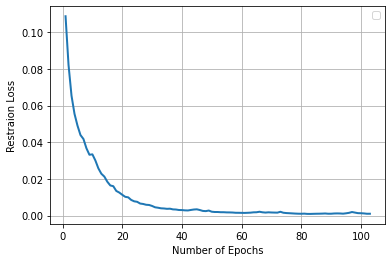

In [ ]:
val_loss_values = model.history.history['val_loss']
epochs = range(1, len(val_loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values)
plt.setp(line1, linewidth = 2 , markersize=10)
plt.xlabel('Number of Epochs') 
plt.ylabel('Restraion Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis//runet_models/A/runet.h5')

In [ ]:
output_images = model.predict(adv_spa)

In [ ]:
#output_images = np.clip(output_images, 0, 1)

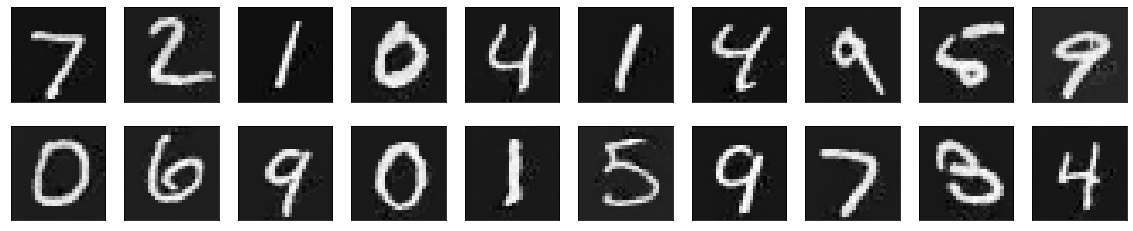

In [ ]:
fig = plt.figure(figsize=(20, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(output_images[idx].reshape(28, 28), cmap = 'gray')

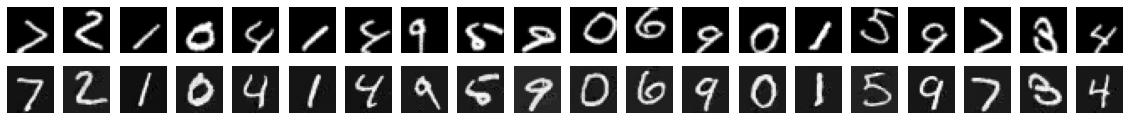

In [ ]:
# Display
grid_col = 20
grid_row = 2


f, axarr = plt.subplots(grid_row, grid_col, figsize=(grid_col, grid_row))

i = 0
for row in range(0, grid_row, 2):
    for col in range(grid_col):
        axarr[row,col].imshow(adv_spa[i].reshape(28, 28), cmap = 'gray')
        axarr[row,col].axis('off')
        axarr[row+1,col].imshow(output_images[i].reshape(28, 28), cmap = 'gray')
        axarr[row+1,col].axis('off')        
        i += 1

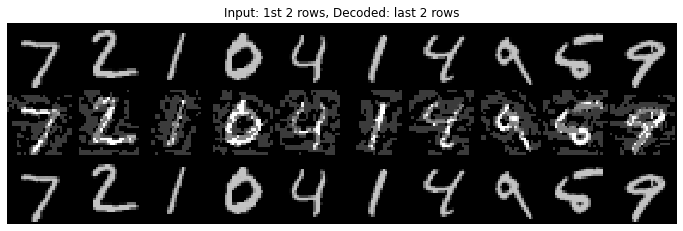

In [ ]:
# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:10].reshape(10, 28, 28), fgsm[:10].reshape(10, 28, 28), output_images[:10].reshape(10, 28, 28)])
imgs = imgs.reshape((3, 10, 28, 28))

imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure(figsize = (12, 4))
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap = 'gray')